In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(24,10)})

filename = 'titanic.csv'
rv_names = ['S', 'C', 'G', 'A']

In [7]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0
...,...,...,...,...
882,0,2,1,27.0
883,1,1,0,19.0
884,0,3,0,7.0
885,1,1,1,26.0


## Part a - PMFs of S, C, G, A

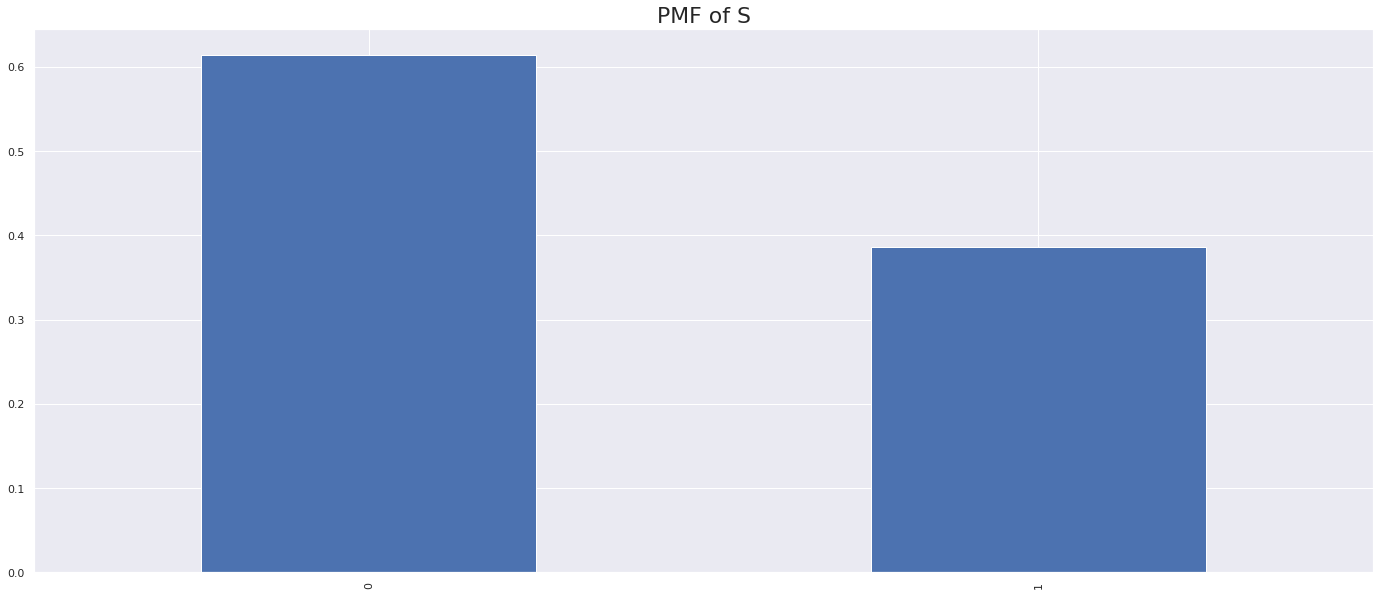

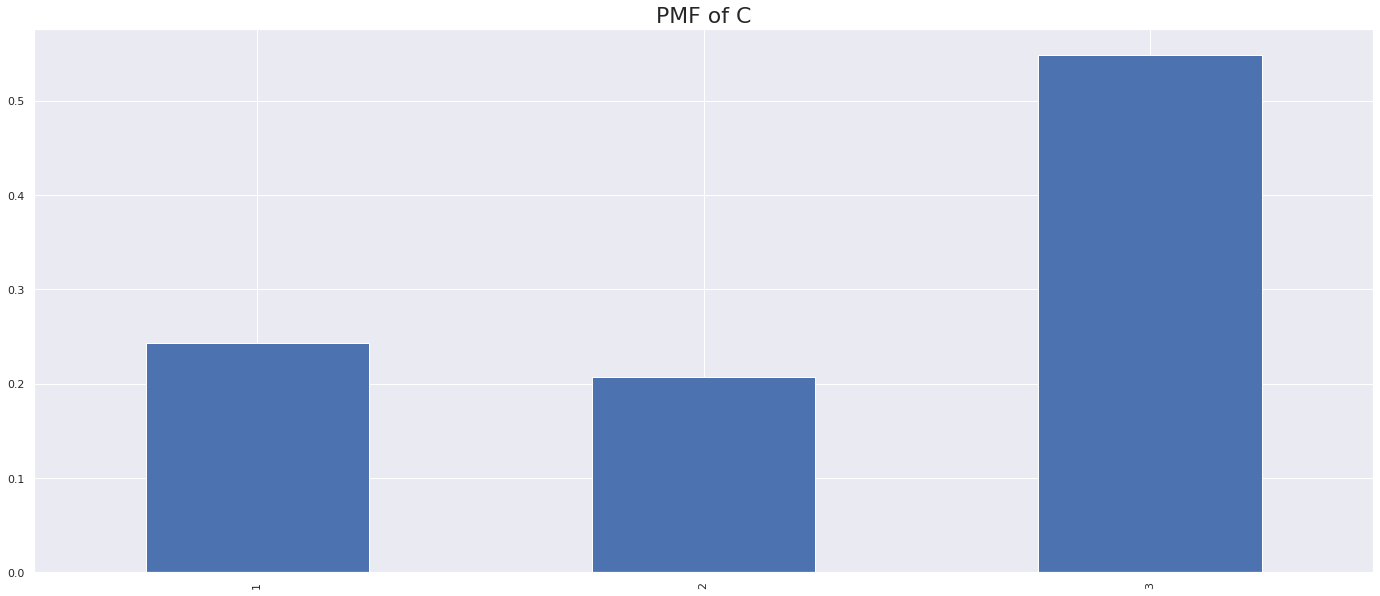

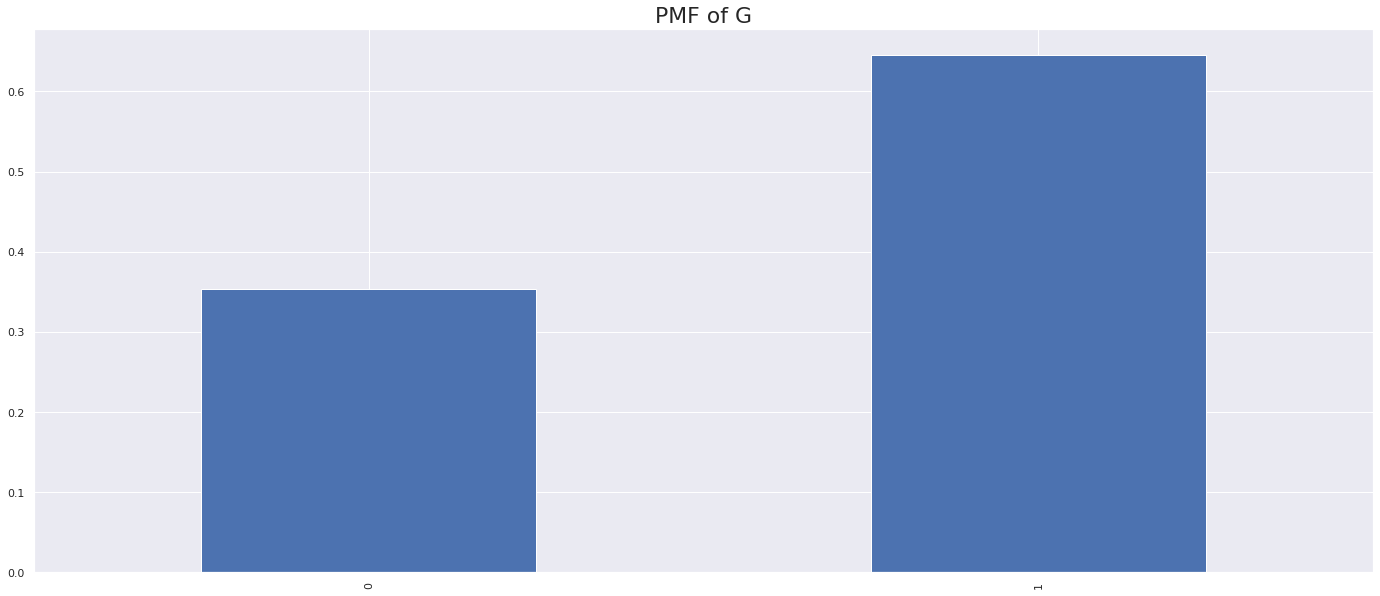

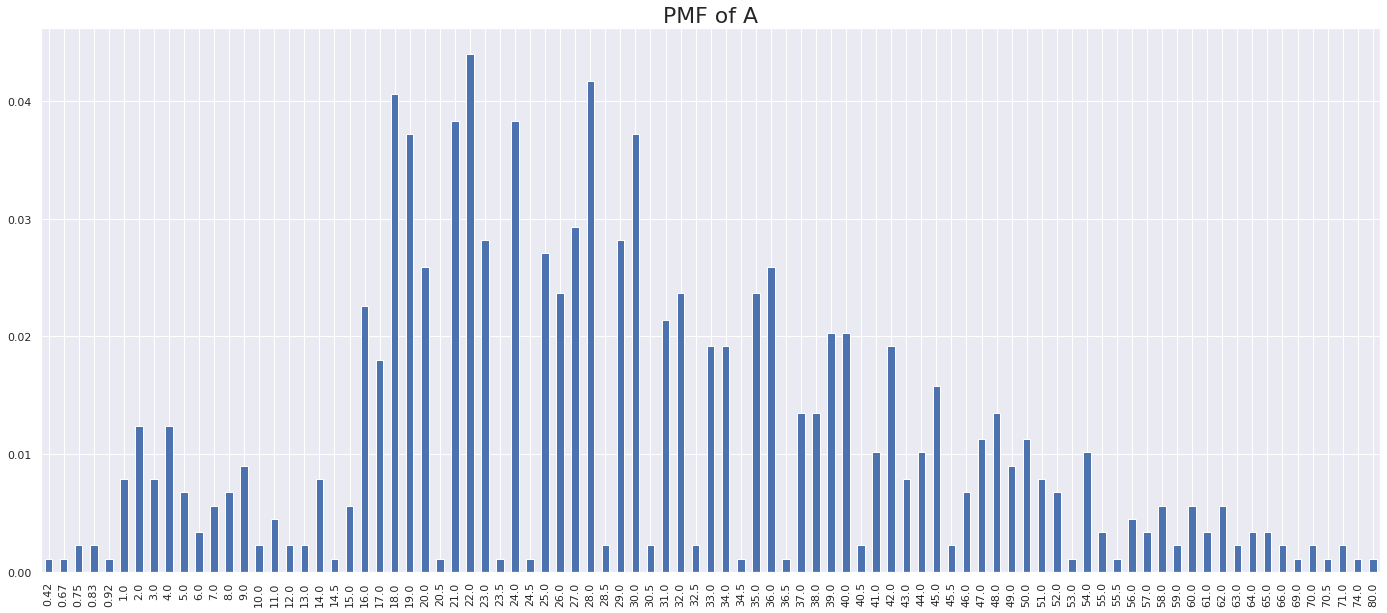

In [41]:
for i in range(0, df.shape[1]):
    col = df.iloc[:, i]
    pmf = col.value_counts().sort_index() / len(col)
    fig = plt.figure()
    #fig.suptitle("PMF of {}".format(rv_names[i]), fontsize=24)
    ax = fig.add_subplot(111)
    ax.set_title("PMF of {}".format(rv_names[i]), fontdict={'fontsize': 22, 'fontweight': 'medium'})
    pmf.plot(kind="bar")

## Part b - Conditional PMFs of C, G, A, conditioned on S

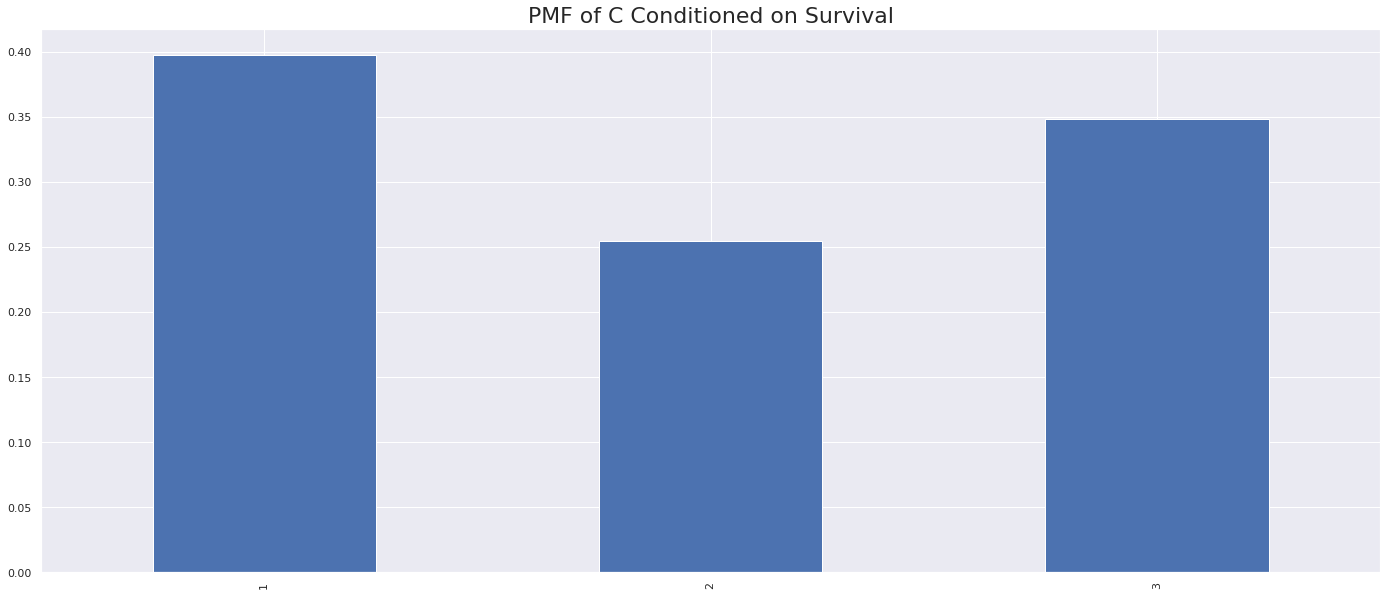

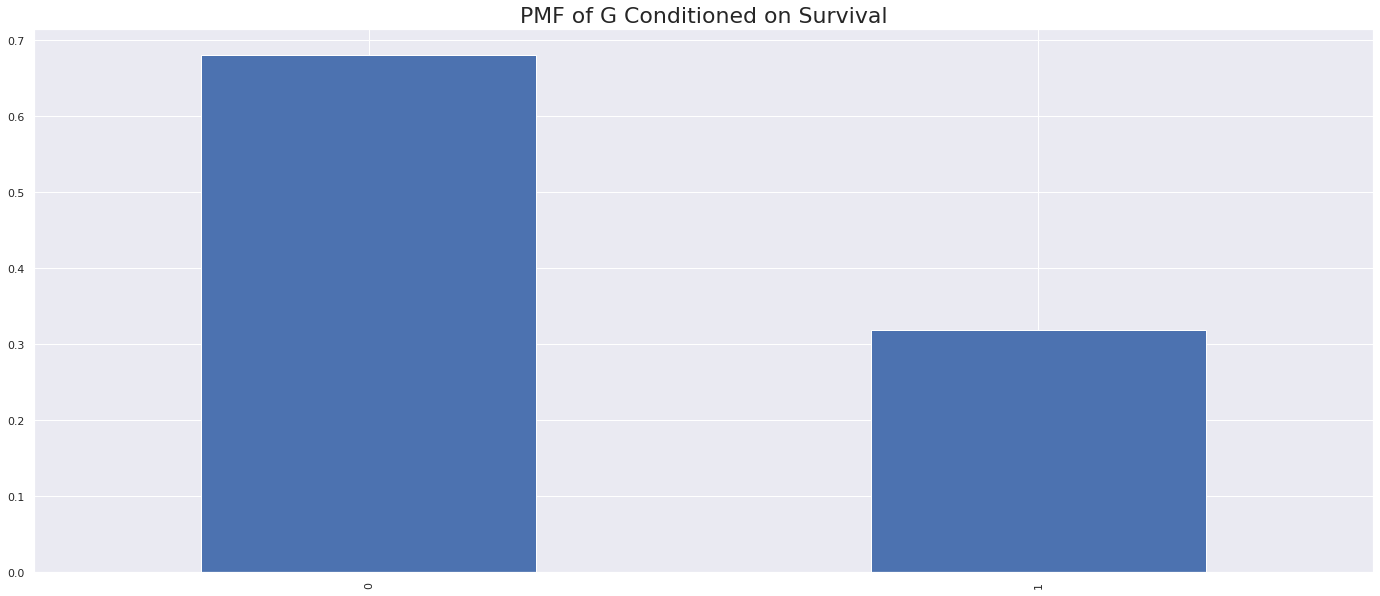

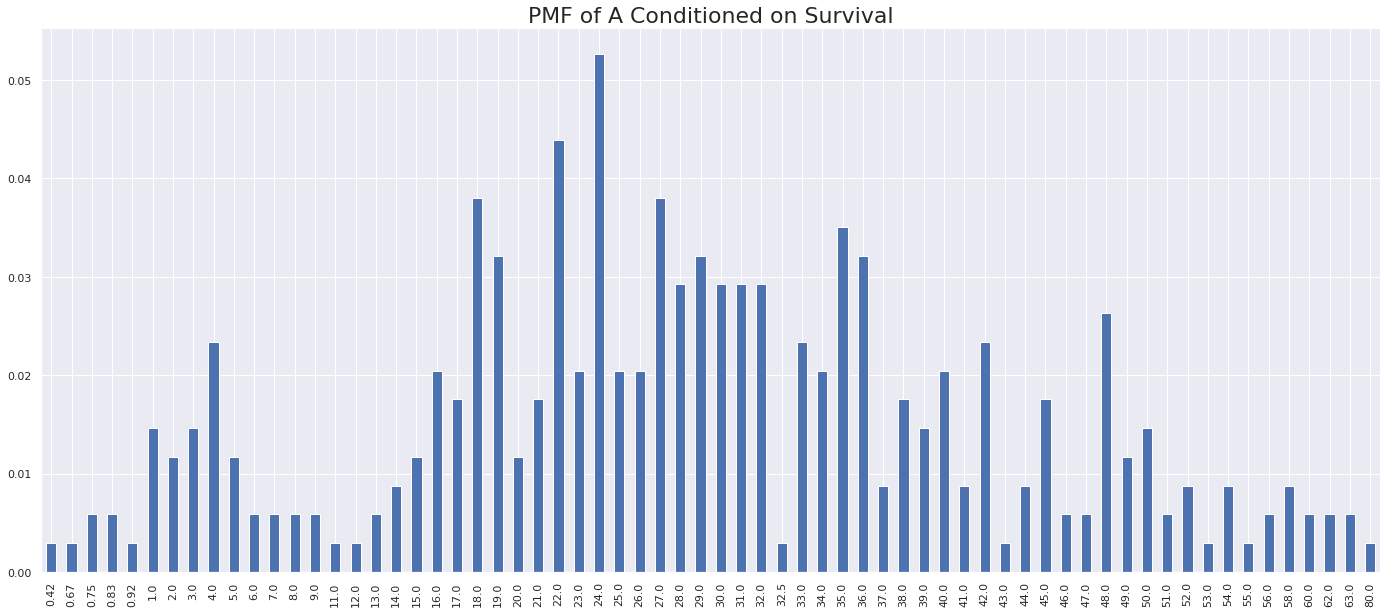

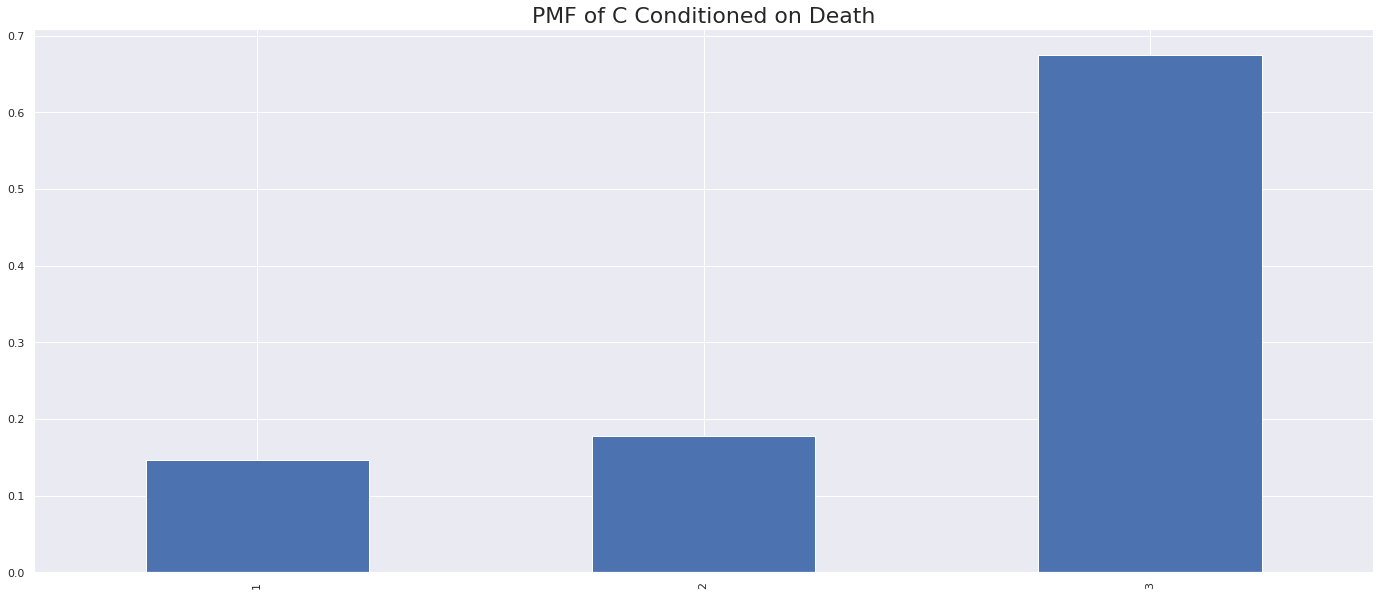

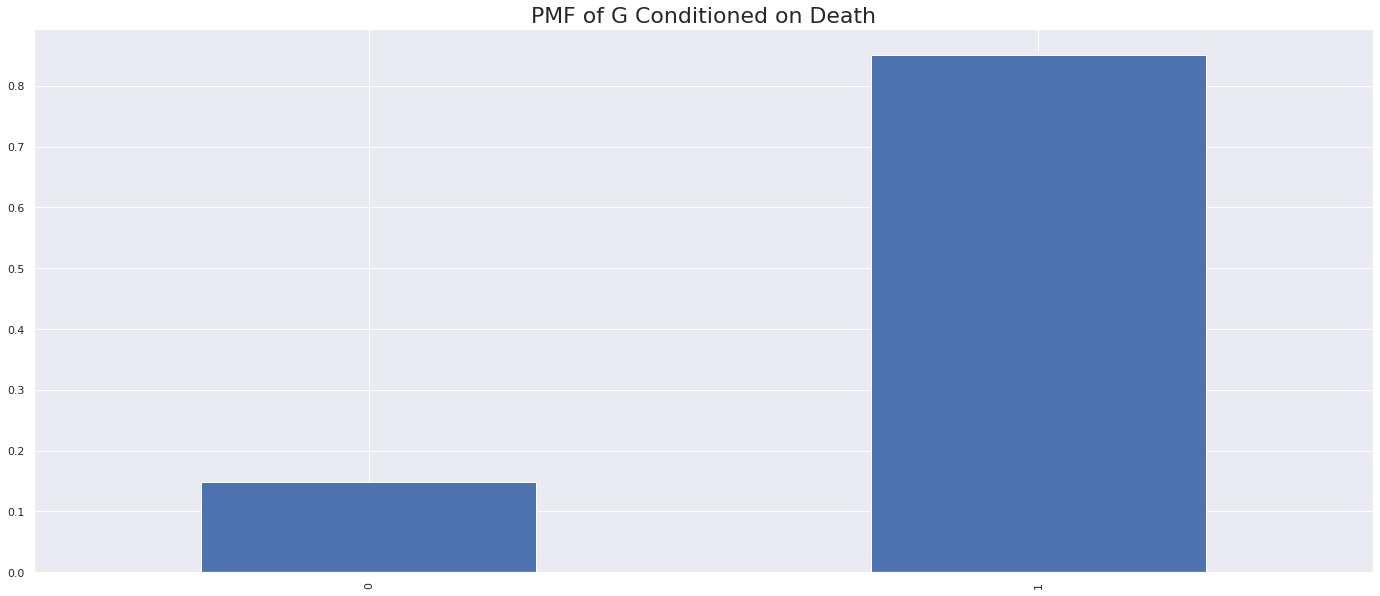

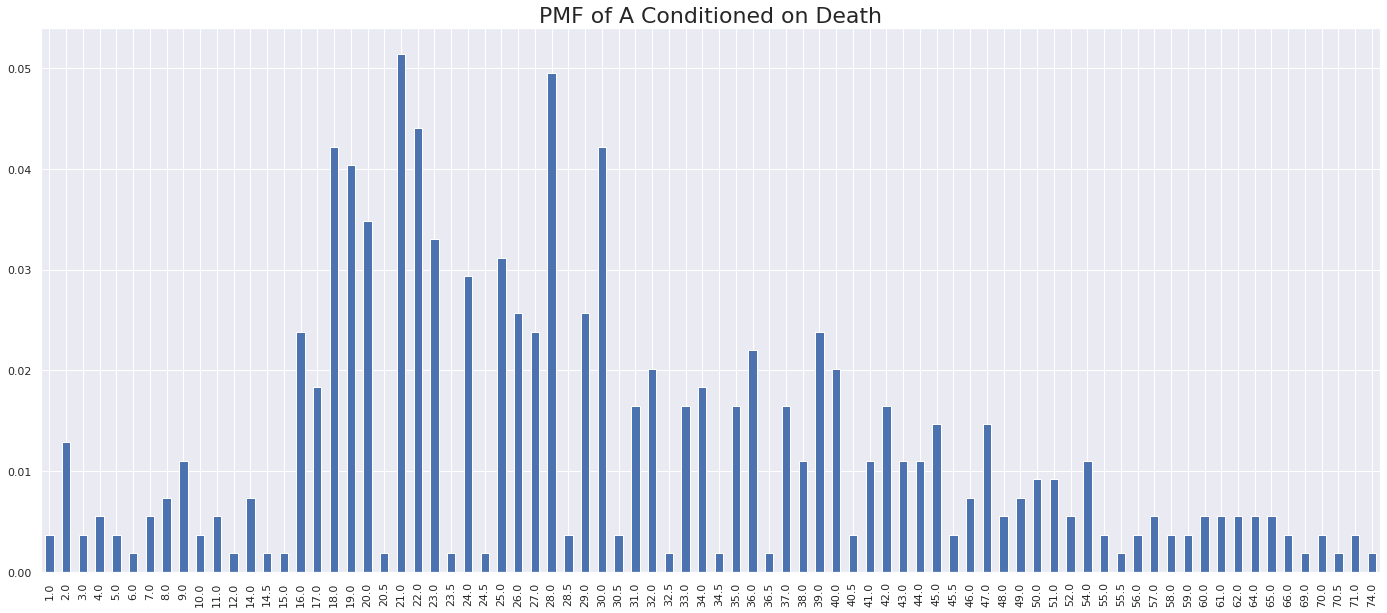

In [55]:
df_s1 = df[df["Survived"] == 1]
df_s0 = df[df["Survived"] == 0]

for ix, col_name in enumerate(["Pclass", "Sex", "Age"]):
    col = df_s1[col_name]
    pmf_cond = col.value_counts().sort_index() / len(col)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("PMF of {} Conditioned on Survival".format(rv_names[ix+1]), fontdict={'fontsize': 22, 'fontweight': 'medium'})
    pmf_cond.plot(kind="bar")
    
for ix, col_name in enumerate(["Pclass", "Sex", "Age"]):
    col = df_s0[col_name]
    pmf_cond = col.value_counts().sort_index() / len(col)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("PMF of {} Conditioned on Death".format(rv_names[ix+1]), fontdict={'fontsize': 22, 'fontweight': 'medium'})
    pmf_cond.plot(kind="bar")

## Part c - computing probabilities

In [74]:
pmf_survival = df["Survived"].value_counts().sort_index() / len(df["Survived"])

pS0 = pmf_survival[0]
pS1 = pmf_survival[1]

pmf_s1_class = df_s1["Pclass"].value_counts().sort_index() / len(df_s1["Pclass"])
pmf_s0_class = df_s0["Pclass"].value_counts().sort_index() / len(df_s0["Pclass"])

pC1S1 = pmf_s1_class[1]
pC1S0 = pmf_s0_class[1]

pmf_s1_gender = df_s1["Sex"].value_counts().sort_index() / len(df_s1["Sex"])
pmf_s0_gender = df_s0["Sex"].value_counts().sort_index() / len(df_s0["Sex"])

pG0S1 = pmf_s1_gender[0]
pG0S0 = pmf_s0_gender[0]

pmf_s1_age = df_s1["Age"].value_counts().sort_index() / len(df_s1["Age"])
pmf_s0_age = df_s0["Age"].value_counts().sort_index() / len(df_s0["Age"])

pA40S1 = pmf_s1_age.loc[pmf_s1_age.index <= 40.0].sum()
pA40S0 = pmf_s0_age.loc[pmf_s0_age.index <= 40.0].sum()

0.8099415204678363
0.7926605504587156


In [76]:
pS0C1G0A40 = pS0*pC1S0*pG0S0*pA40S0
#print(pS0C1G0A40)

pS1C1G0A40 = pS1*pC1S1*pG0S1*pA40S1
#print(pS1C1G0A40)

0.010625322687488963
0.08460553314142816
